<a href="https://colab.research.google.com/github/MedAziz218/Image-Processing/blob/main/Exercie4_Image_TD1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

comparaison entre f et DFT-1(F):  0.0


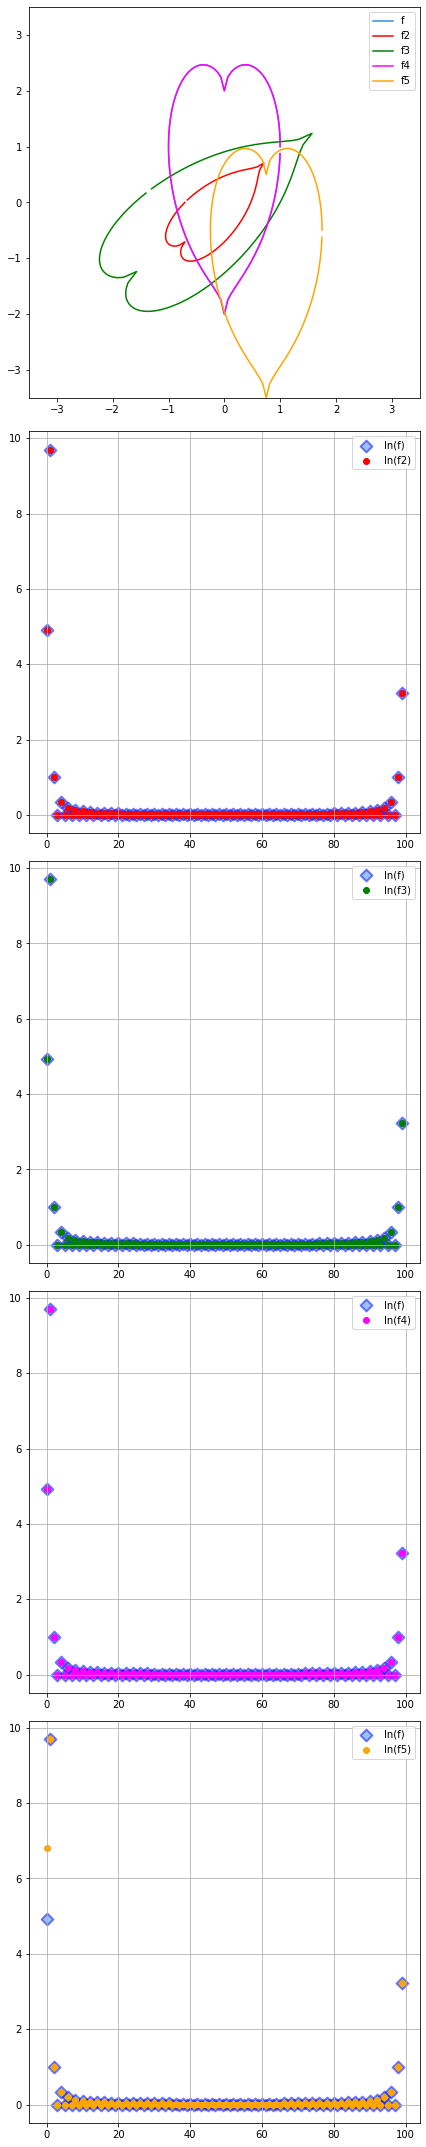

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi
fig, axs = plt.subplots(5,1)

#Question 1
def DFT( f : np.array):
    N = f.size
    _F = np.vectorize(lambda k: np.sum( f*  np.exp( np.arange(0,N,1) *-2*1j*k*pi/N)  )/N)
    return _F(np.arange(N)) 
    #-- OR --#
    #_F = lambda k: np.sum( f*  np.exp( np.arange(0,N,1) *-2*1j*k*pi/N)  )/N
    #return np.array([_F(k) for k in range(0,N)]) 
 
def DFT_INVERSE( F : np.array):
    N = F.size
    _f = np.vectorize(lambda k: np.sum( F*  np.exp( np.arange(0,N,1) *2*1j*k*pi/N)  ))
    return _f(np.arange(N)) 
    #-- OR --#
    #_f = lambda k: np.sum( F*  np.exp( np.arange(0,N,1) *2*1j*k*pi/N)  )
    #return np.array([_f(k) for k in range(0,N)])
 
def I(F: np.array):
    return np.abs(F) / np.abs(F[2])

# Question 2.a
t = np.arange(0,1,0.01)

x = lambda t: np.cos(2*(pi)*t)
y = lambda t: 2*np.sin(2*pi*t) + np.sqrt(np.abs(np.cos(2*pi*t)))

xs = x(t)
ys = y(t)



# Question 2.b
color='#3489eb'
f = xs + 1j*ys

F = DFT(f)
I_f = I(F)

axs[0].plot( xs,ys , label="f",color = color )
for i in range(1,5):    
    axs[i].scatter(np.arange(I_f.size),I_f,label="In(f)",color = color,linewidths = 2, marker ="D", edgecolor ="b", s = 70, alpha=0.5)

# Question 2.c
f1 = DFT_INVERSE(F)
print("comparaison entre f et DFT-1(F): ",np.abs(f1-f).max().round(12))



### constante a ###
alpha = 0.5
beta = pi*3/4
a =  alpha * np.exp(1j*beta)
###################


# Question 3
color='red'
f2 = a*f
F2 = DFT(f2)
I_f2 = I(F2)
axs[0].plot(f2.real,f2.imag,label = "f2",color = color)
axs[1].scatter(np.arange(I_f2.size),I_f2, label = "In(f2)",color = color)

#print("comparaison entre In(f) et In(f2): ",np.abs(I_f2-I_f).max().round(12))


# Question 4
color='green'
f3 = np.exp(1j*2*pi*beta) * f 
F3 = DFT(f3)
I_f3 = I(F3)
axs[0].plot(f3.real,f3.imag, label = "f3",color = color)
axs[2].scatter(np.arange(I_f3.size),I_f3, label = "In(f3)",color = color)


### constante t0 ###
t0 = 200
###################


# Question 5
color = 'magenta'
f4 = x(t+t0) + 1j*y(t+t0)
F4 = DFT(f4)
I_f4 = I(F4)
axs[0].plot(f4.real,f4.imag, label = "f4",color = color)
axs[3].scatter(np.arange(I_f4.size),I_f4, label = "In(f4)",color = color)


### constante b ###
b = 0.75-1.5j
###################


# Question 6
color = 'orange'
f5 = f + b
F5 = DFT(f5)
I_f5 = I(F5)
axs[0].plot(f5.real,f5.imag, label = "f5",color = color)
axs[4].scatter(np.arange(I_f5.size),I_f5, label = "In(f5)",color = color)



###--- plot settings ---###
w = 3.5

for i in range(5):
    if i:axs[i].grid()
    axs[i].legend()
axs[0].set_aspect('equal', 'box')
axs[0].set(xlim = (-w,w), ylim = (-w,w))
fig.set(figheight = 30)
fig.tight_layout()
plt.show()
